# Wstęp do NLP

In [ ]:
! pip install gensim
! pip install nltk

In [ ]:
from collections import OrderedDict

import nltk
import matplotlib.pyplot as plt
import gensim.downloader as api
import numpy as np

nltk.download('brown')

# Prawo Zipfa

In [3]:
words = nltk.corpus.brown.words()

# print 20 first words from the brown corpus
print(" ".join(words[:20]))

The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that


In [4]:
def has_alpha(pair):
  """Checks if the first element from in a pair contains an alphabethical char."""
  return any(c.isalpha() for c in pair[0])


# Filter out non-alphabetic words
words = list(filter(has_alpha, words))


# get frequency tables of words, sorted by frequency
words_freq = nltk.FreqDist(words).most_common()

In [5]:
words_freq[:5]

[('the', 62713), ('of', 36080), ('and', 27915), ('to', 25732), ('a', 21881)]

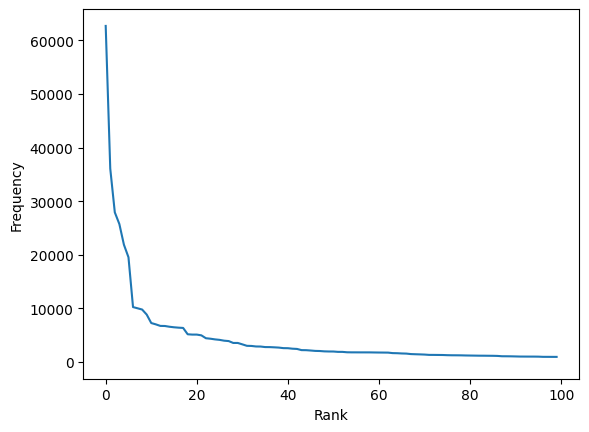

In [6]:
def plot_most_frequent(freq_list, n=100):
    freqs = [freq for word, freq in freq_list[:n]]
    plt.plot(list(range(n)), freqs, 1)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.show()


plot_most_frequent(words_freq)

# Najprostsze wektory słów

In [7]:
class OneHotEmbedding:
    def __init__(self, brown_words):
        self.brown_words = brown_words
        self.unique_words = list(set(self.brown_words))
        self.vocab_size = len(self.unique_words)
        self.vocab = OrderedDict(zip(self.unique_words, range(self.vocab_size)))

    def __call__(self, word):
        if word not in self.vocab:
            raise ValueError('Word not in vocabulary.')
        emb = np.zeros(self.vocab_size)
        emb[self.vocab[word]] = 1
        return emb

In [8]:
example_words = words[:20]
embeddings = OneHotEmbedding(example_words)
for word in example_words:
    print(f'{word:<15}: {embeddings(word)}')

The            : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Fulton         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
County         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Grand          : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Jury           : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
said           : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Friday         : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
an             : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
investigation  : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
of             : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Atlanta's      : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
recent         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
primary        : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

# Wektory słów

In [9]:
word_vectors = api.load("glove-wiki-gigaword-100")

In [10]:
word_vectors['banana']

array([-0.34028  ,  0.46436  , -0.083324 ,  0.20186  , -0.17831  ,
       -0.4663   ,  0.61793  ,  0.30129  ,  0.5728   , -0.34783  ,
       -0.9216   ,  0.30484  ,  0.30382  ,  0.58035  ,  0.12112  ,
        0.77288  ,  1.1547   , -0.576    ,  0.51471  ,  0.21552  ,
        0.21106  ,  0.67875  ,  1.1962   ,  0.11142  ,  0.50809  ,
        1.1873   ,  0.035288 , -0.88952  ,  0.042803 , -0.36714  ,
        0.37993  ,  0.61945  ,  1.0194   , -0.95084  , -0.0072258,
        0.69454  ,  0.38692  , -0.18544  ,  0.2885   , -0.81279  ,
       -0.46473  , -0.82623  ,  0.42778  , -0.14064  ,  0.30173  ,
        0.074418 , -0.40044  ,  0.33969  , -0.62917  , -0.054449 ,
       -0.78469  ,  0.2354   , -0.78359  ,  0.74708  , -0.31074  ,
       -0.07038  , -0.34623  ,  0.33849  ,  0.89621  ,  0.30288  ,
        0.012978 ,  0.020869 , -0.14436  , -0.40914  ,  0.16651  ,
       -0.88124  , -0.078419 ,  0.048156 ,  0.27032  , -0.81761  ,
        0.027778 ,  0.62487  ,  0.1549   , -0.15838  ,  0.0886

In [11]:
word_vectors.most_similar('banana')

[('coconut', 0.7097253203392029),
 ('mango', 0.7054824829101562),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [12]:
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def print_cosine_similarity(word1, word2):
    print(f"similarity({word1}, {word2}):", cosine_similarity(word_vectors[word1], word_vectors[word2]))


print_cosine_similarity('school', 'university')
print_cosine_similarity('car', 'truck')
print_cosine_similarity('table', 'phone')

similarity(school, university): 0.7548451
similarity(car, truck): 0.8597878
similarity(table, phone): 0.34241307


In [13]:
# Poniższą funkcję można wykonać dużo bardziej efektywnie za funkcji z biblioteki gensim.

def knn(vec, k=5):
    distances = [
        (other_word, cosine_similarity(vec, word_vectors[other_word]))
        for other_word in word_vectors.key_to_index.keys()
    ]
    distances.sort(key=lambda x: x[1], reverse=True)
    return distances[:k]


def print_synonyms(word):
    res = knn(word_vectors[word])
    print(f"Synonyms of '{word}':", [r for r, _ in res])


print_synonyms('school')  # equivalent to word_vectors.most_similar('school')

Synonyms of 'school': ['school', 'college', 'schools', 'elementary', 'students']


In [14]:
# Zauważmy, że słowo 'head' ma wiele znaczeń, więc bywa używane w różnych kontekstach.
# Stąd bliskość zarówno do "body" (jako część ciała), jak i "chief" (jako szef).

knn(word_vectors['head'])

[('head', 1.0),
 ('heads', 0.79870373),
 ('headed', 0.70127535),
 ('chief', 0.6871476),
 ('body', 0.68329155)]

In [15]:
def analogy(word1, word2, word3):
    vec = (word_vectors[word2] - word_vectors[word1] + word_vectors[word3]) / 3
    res = knn(vec)

    # remove tuples with word1, word2 and word3
    res = [x for x in res if x[0] not in [word1, word2, word3]]
    print(f'{word1} -> {word2}, {word3} -> [{res[0][0]}]')


analogy('man', 'king', 'woman')
analogy('poland', 'warsaw', 'usa')
analogy('fall', 'fell', 'swim')

man -> king, woman -> [queen]
poland -> warsaw, usa -> [d.c.]
germany -> beer, france -> [wine]
fall -> fell, swim -> [swam]
